# Classifying Iris Species

Let's assume that a hobby botanist is interested in distinguishing the species of some iris flowers that she has found. She has collected some measurements associated with each iris: the length and width of the petals and the length and width of the sepals, all measured in centimetres. <br>
<br>
She also has the measurements of some irises that have been previously identified by an expert botanist as belonging to the species setosa, versicolor, or virginica. For these measurements, she can be certain of which species each iris belongs to. Let's assume that these are the only species our hobby botanist will encounter in the wild. <br>
<br>
Attribute Information: <br>

1. sepal length in cm <br>
2. sepal width in cm <br>
3. petal length in cm <br>
4. petal width in cm <br>
5. class: <br>
-- Iris Setosa <br>
-- Iris Versicolour <br>
-- Iris Virginica <br>

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png")

## Import libraries

In [2]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn import datasets

# Importing and loading the iris dataset
from sklearn.datasets import load_iris
iris = sns.load_dataset('iris')

##### First five rows of iris dataset: 

In [4]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


##### The main categories are:

In [5]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### There are three iris species in this dataset: setosa, versicolor and virginica. 

In [6]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris['species'].keys()

RangeIndex(start=0, stop=150, step=1)

##### Is there any data missing?

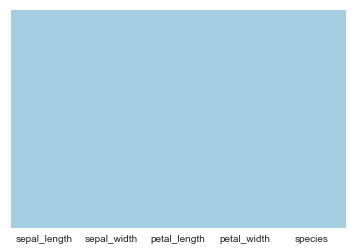

In [8]:
# Heatmap for visualising missing data:
sns.heatmap(iris.isnull(), yticklabels = False, cbar = False, cmap = 'Paired')

##### Looking at heatmap, we can assume that there is no data missing. We will doublecheck this assumption by having a quick look at iris.info():

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


All the data is populated and we can have a look at EDA now. 

## Exploratory Data Analysis (EDA) 

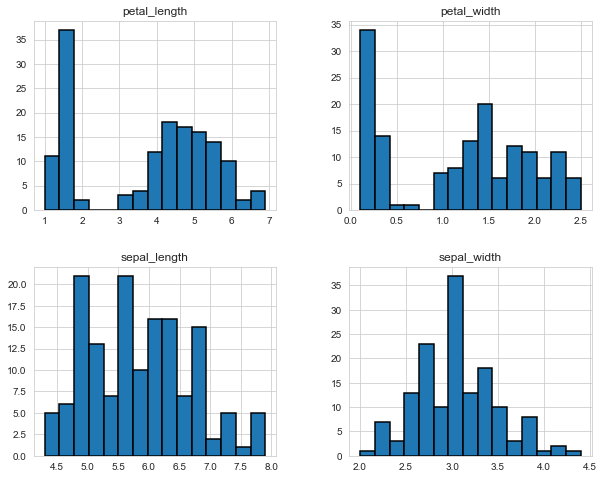

In [10]:
# Histograms for petal and sepal data (for training set X)
iris.hist(edgecolor = 'black', linewidth = 1.5, bins = 15, figsize = (10,8))
plt.show()

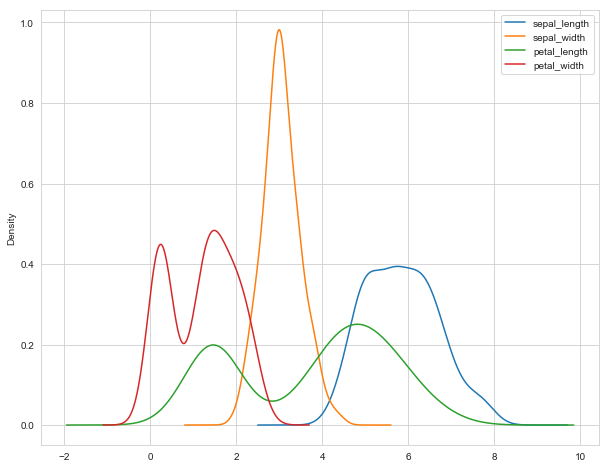

In [11]:
# Density
iris.plot(kind = "density", figsize=(10,8))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


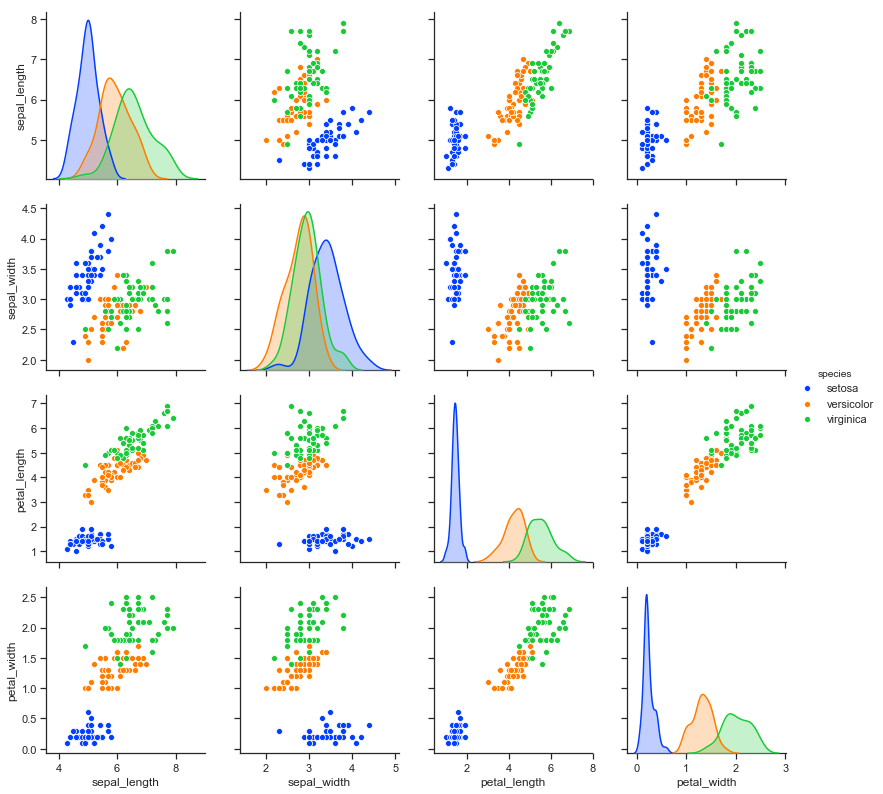

In [12]:
# Plotting the features of the training set X (this gives us data viz for each feature) 
sns.set(style="ticks")
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species',palette='bright', size = 2.8)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


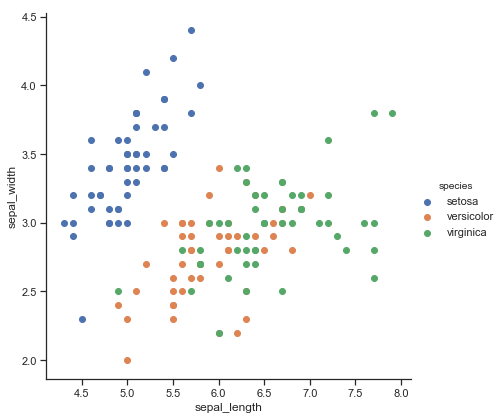

In [13]:
# Visualising data with FacetGrid, this colors the scatterplot by species (can be found above)
sns.FacetGrid(iris, hue = 'species', size=6) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e92f320>,
      dtype=object)

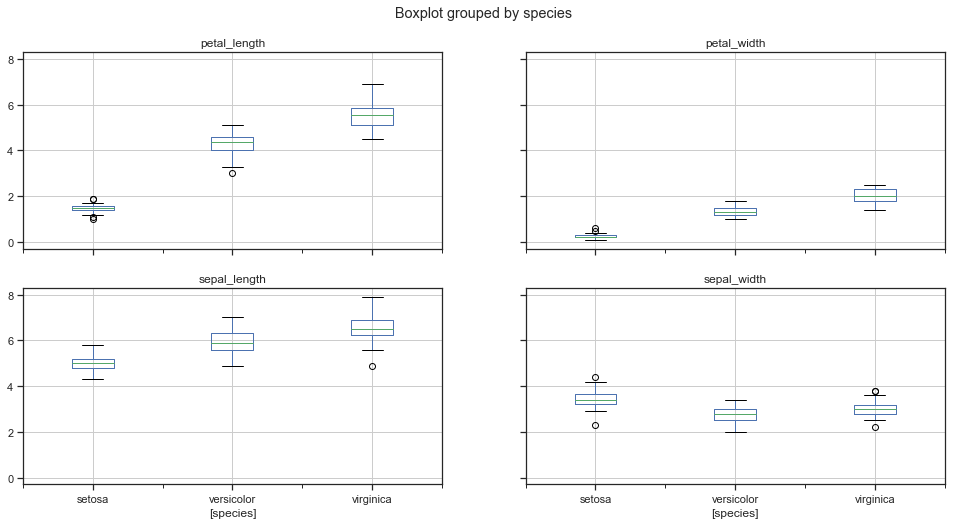

In [14]:
# Visualising data with boxplots:
iris.boxplot(by = 'species', figsize = (16,8))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


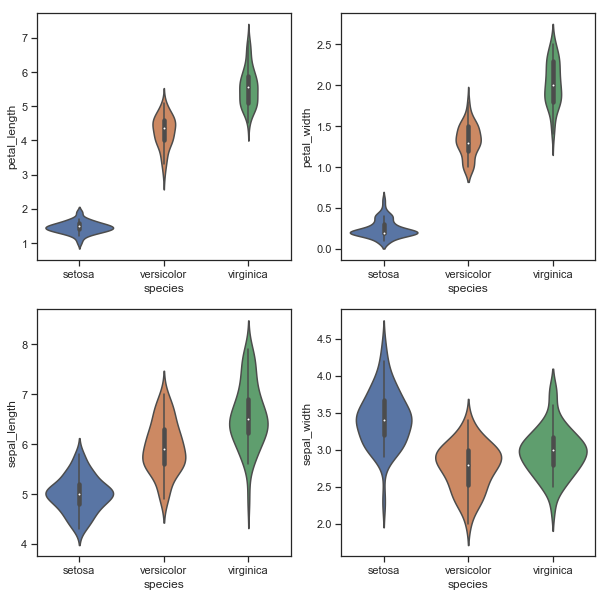

In [15]:
# Violin plot

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)

plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)

plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

##### We can distinguish setosa according to petal length and width, data for versicolor and virginica is scattered.  

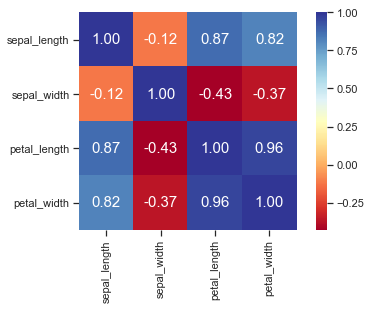

In [16]:
# Drawing  heatmap with input as the correlation matrix calculted by(iris.corr():
plt.figure(figsize=(7,4)) 

sns.heatmap(iris.corr(),cbar = True, square = True, annot=True, fmt='.2f',annot_kws={'size': 15}, cmap='RdYlBu') 
plt.show()

## Training and testing data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Defining target set y, and a training set X:
y = iris.species
X = iris.drop('species', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101, stratify = y)

## Building the model: K-Nearest Neighbors

In [19]:
# The most important parameter of k-Nearest Neighbors classifier is the number of neighbors, which we will set to 1:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

In [20]:
# Fitting the data with knn model:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## Evaluating the model 

In [21]:
# Using the predict method on KNN to predict values for X_test:
y_pred = knn.predict(X_test)

In [22]:
# Print out "Test set predictions":
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 ['virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'versicolor' 'virginica' 'setosa' 'virginica' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'setosa' 'virginica' 'setosa' 'setosa'
 'versicolor' 'setosa' 'versicolor']


In [23]:
print('Test set score {:.2f}'.format(knn.score(X_test,y_test)))

Test set score 0.96


In [24]:
# Importing classification_method and confusion_matrix:
from sklearn.metrics import classification_report, confusion_matrix

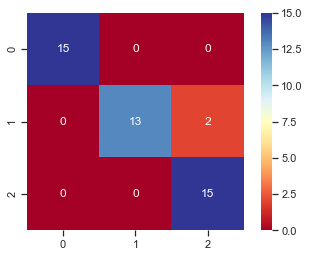

In [25]:
# Confusion matrix:
sns.heatmap(confusion_matrix(y_test, y_pred), square = True, annot = True, fmt = 'g', cmap='RdYlBu')

In [26]:
# Printing out classification report:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.87      0.93        15
   virginica       0.88      1.00      0.94        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## Model Improvement  - choosing the best K-value


In [27]:
# Creating a for loop that trains various KNN models with different K values:
# Keeping a track of the error_rate for each of these models with a list
error_rate = []

# Will take some time
for i in range(1,11):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

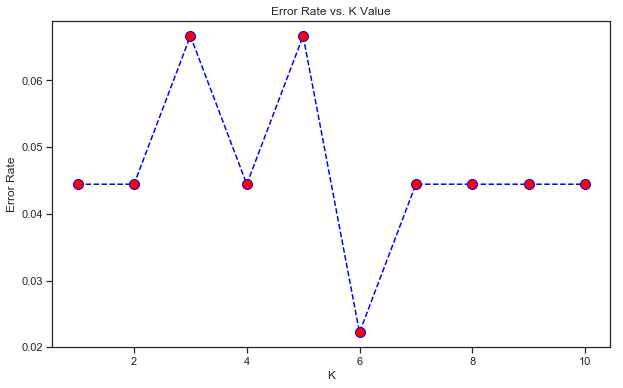

In [28]:
# Creating a plot using the information from the for loop:

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## ## Retraining the Model with new K-value
 

WITH K=6




              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



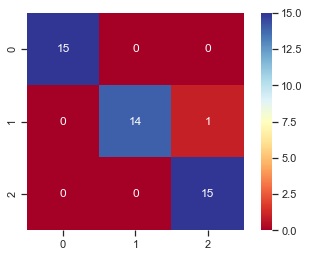

In [29]:
# NOW WITH K=6
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=6')
print('\n')
sns.heatmap(confusion_matrix(y_test,pred), annot = True, square = True, fmt = 'g', cmap='RdYlBu')
print('\n')
print(classification_report(y_test,pred))

## Making new predictions 

In [30]:
# We found an iris flower and want to classify it by using our model: 
x_new = np.array([[5, 2.9, 1, 0.2]])
x_new.shape

(1, 4)

In [31]:
# Predicting the species: 
new_prediction = knn.predict(x_new)
print('Prediction: {}'.format(new_prediction))
print('Predicted target name: {}'.format(iris['species'][new_prediction]))

Prediction: ['setosa']
Predicted target name: setosa    NaN
Name: species, dtype: object
